# Image Segmentation with kMeans Clustering

In [80]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [81]:
# load image
img =  cv2.imread('MRI.png') # Reads an image into BGR Format

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)   #load image with RGB format
img_size = img.shape
print(img_size)



(276, 250, 3)


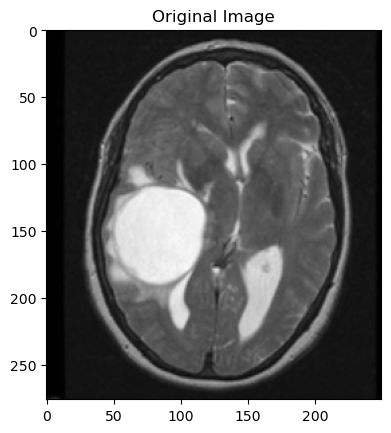

In [82]:
# Display original image
plt.imshow(img)
plt.title("Original Image")
plt.show()

In [83]:
# Reshape data

all_pixels  = img.reshape((-1,3)).astype(float)
print(all_pixels.shape)


(69000, 3)


In [84]:
# Run k-means clustering
from sklearn.cluster import KMeans

K = 4       # Number of clusters

km_model = KMeans(n_clusters=K)
km_model.fit(all_pixels)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [85]:
# Learned Centroids
centers = km_model.cluster_centers_
print(centers) # In RGB Format


[[ 20.01135013  20.01135013  20.01135013]
 [139.76069364 139.76069364 139.76069364]
 [223.06941357 223.06941357 223.06941357]
 [ 87.66142391  87.66142391  87.66142391]]


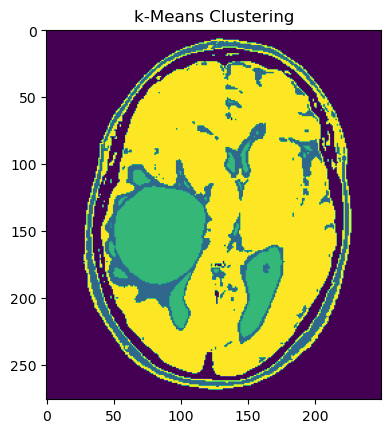

In [86]:
# Display different cluster segments
segmented_img = km_model.labels_    # Clustering Result
segmented_img = segmented_img.reshape(img_size[0], img_size[1])
plt.imshow(segmented_img)
plt.title("k-Means Clustering")
plt.show()

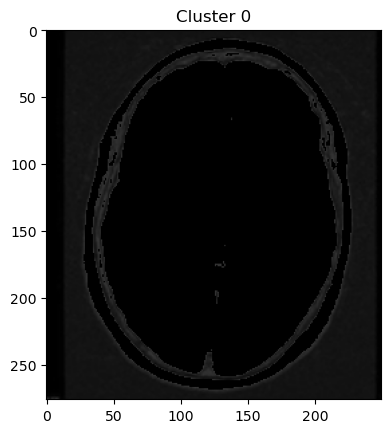

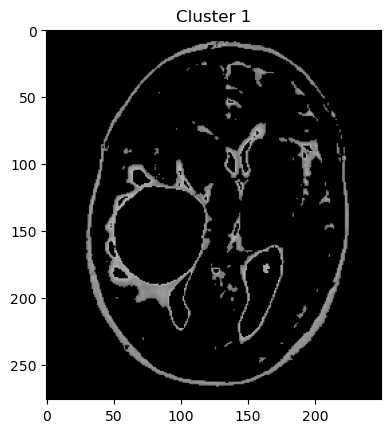

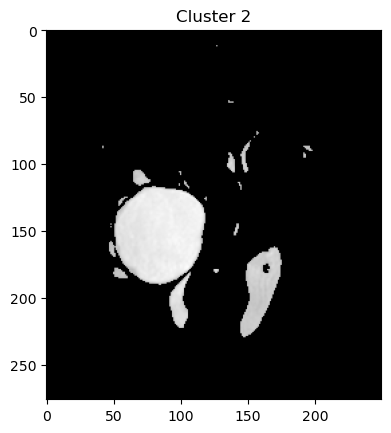

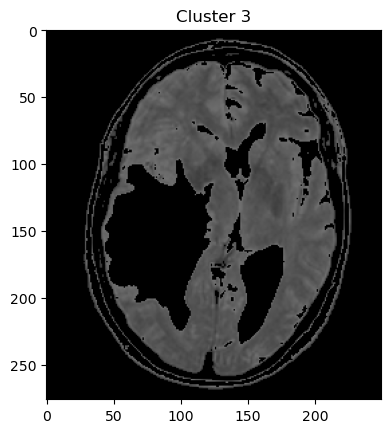

In [87]:
# display different segments separately

for k in range(K):
    plt.imshow(img*(segmented_img == k)[...,None])
    plt.title('Cluster ' + str(k))
    plt.show()


# Todo: Implement your own kMeans Algorithm

In [88]:
# L2 distance
def L2_distance(x, y):
    return np.sqrt( np.sum((x - y)**2, axis=1) )

In [89]:
# My k-means implementation

def my_kMeans(all_data, num_clusters):

    num_data, data_dim = all_data.shape # data size

    # Centroid and cluster initialization
    # centroids = np.random.rand(num_clusters, data_dim) * 256.                 # Random coordinate initialization
    centroids = all_data[np.random.randint(num_data, size = num_clusters),:]    # Random sample initialization
    clusters = (-1)*np.ones(num_data)     # initialize all the clusters with -1

    max_iteration = 20
    for iter in range(max_iteration):
        # save current cluster
        current_clusters = clusters.copy()

        # update cluster
        for k in range(num_data):
            data = all_data[k]  # each data
            # For each data, find the distance from the centroids
            dist = L2_distance(centroids, data)

            # find minimum distance (index) & save
            ########### Implement your code here ######################
            clusters[k] = np.argmin(dist)

        # update the centroids
        for m in range(num_clusters):
            cluster_map = (clusters == m)
            num_samples_in_cluster = cluster_map.sum()

            # find the average of the cluster samples
            ########### Implement your code here ######################
            centroids[m] = np.sum(all_data[cluster_map], axis=0) / num_samples_in_cluster



        # We stop when the clusters does not change
        if np.sqrt(((current_clusters - clusters)**2).sum()) < 1e-20:
            break

    return clusters, centroids

In [90]:
# Run your kMeans

K = 4

labels, cent = my_kMeans(all_pixels, K)

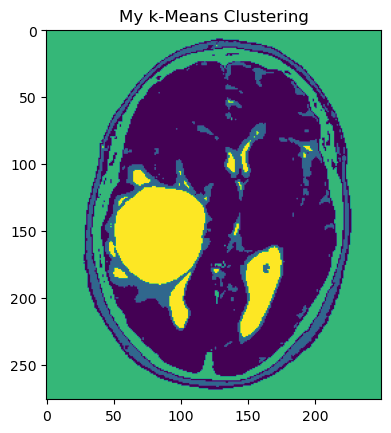

In [91]:
# Display the segmentation results
seg_img = labels.reshape(img_size[0], img_size[1])
plt.imshow(seg_img)
plt.title("My k-Means Clustering")
plt.show()

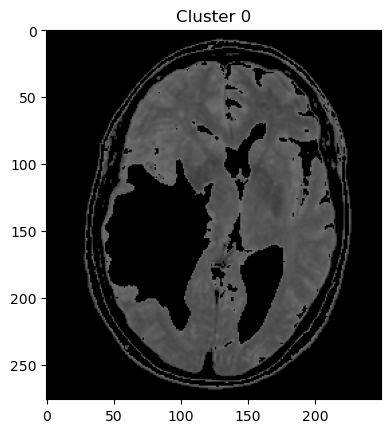

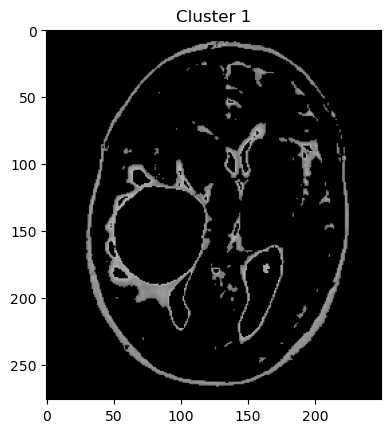

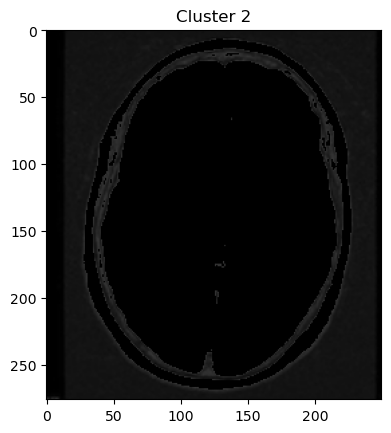

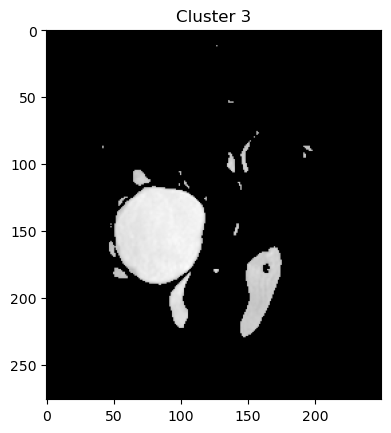

In [92]:
for k in range(K):
    plt.imshow(img*(seg_img == k)[...,None])
    plt.title('Cluster ' + str(k))
    plt.show()
